# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pprint as pprint

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

merged_mouse_data
# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
number_of_mice = merged_mouse_data['Mouse ID'].nunique()
number_of_mice

249

In [4]:
duplicate_data = merged_mouse_data[merged_mouse_data.duplicated(subset= ["Mouse ID","Timepoint"])]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_data = merged_mouse_data[merged_mouse_data["Mouse ID"] == "g989"]
all_duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_merged_mouse_data = merged_mouse_data[merged_mouse_data["Mouse ID"] != "g989"]
cleaned_merged_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_number_of_mice = cleaned_merged_mouse_data['Mouse ID'].nunique()
cleaned_number_of_mice

248

In [10]:
#Making a new, clean data frame with fresh index numbers
SCC_mice_data = cleaned_merged_mouse_data.reset_index()
SCC_mice_data['Mouse ID'].nunique()

248

## Summary Statistics

In [11]:
SCC_grouped_drug = SCC_mice_data.groupby("Drug Regimen")


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = SCC_grouped_drug["Tumor Volume (mm3)"].mean()
median_tumor_volume = SCC_grouped_drug["Tumor Volume (mm3)"].median()
variance_tumor_volume = SCC_grouped_drug["Tumor Volume (mm3)"].var()
std_tumor_volume = SCC_grouped_drug["Tumor Volume (mm3)"].std()
sem_tumor_volume = SCC_grouped_drug["Tumor Volume (mm3)"].sem()

tumor_vol_by_drug = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
    
})

tumor_vol_by_drug


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_by_drug = SCC_mice_data["Drug Regimen"].value_counts()
count_by_drug

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

<Axes: xlabel='Drug Regimen', ylabel='Number of Observed Mouse Timepoints'>

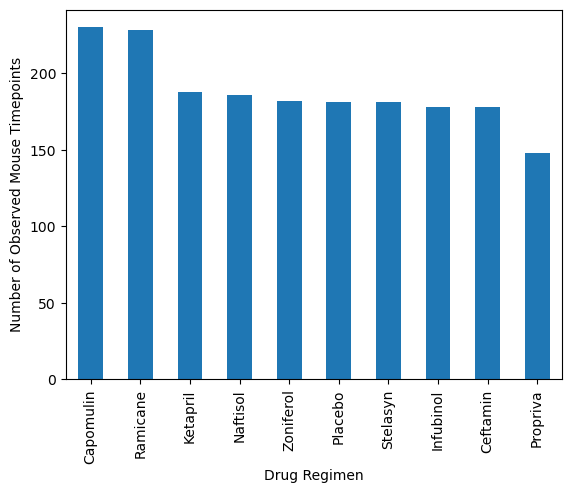

In [15]:
pdbar = count_by_drug.plot(kind="bar", xlabel="Drug Regimen", ylabel="Number of Observed Mouse Timepoints")
pdbar

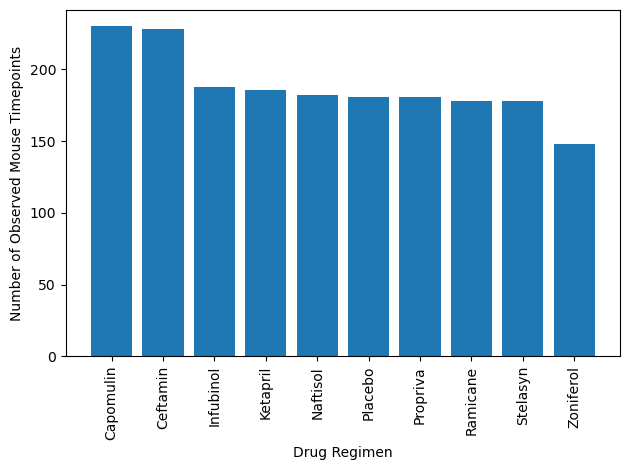

In [16]:
plt.bar(tumor_vol_by_drug.index, count_by_drug)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
sex_count = SCC_mice_data["Sex"].value_counts()
sex_count

Sex
Male      958
Female    922
Name: count, dtype: int64

<Axes: title={'center': 'Copmarison of Sex Between Mice'}, ylabel='count'>

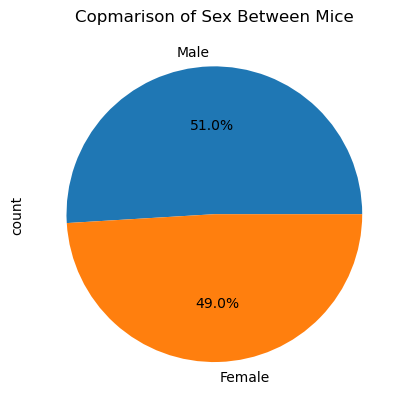

In [18]:
# Pandas Pie chart for M vs F
pdpie = sex_count.plot(kind="pie", autopct="%1.1f%%", title="Copmarison of Sex Between Mice")
pdpie

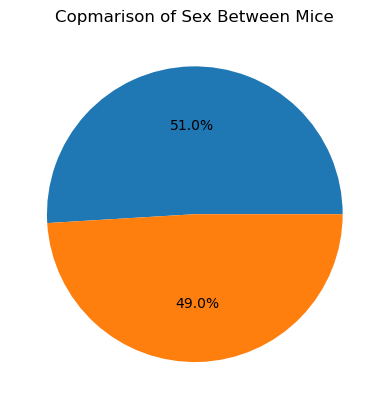

In [19]:
# Matplotlib Pie chart for M vs F
plt.pie(sex_count, autopct="%1.1f%%")
plt.title("Copmarison of Sex Between Mice")
plt.tight_layout
plt.show()



## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specific_df = SCC_mice_data[(SCC_mice_data["Drug Regimen"] == "Capomulin") | 
                            (SCC_mice_data["Drug Regimen"] == "Ramicane") | 
                            (SCC_mice_data["Drug Regimen"] == "Infubinol") | 
                            (SCC_mice_data["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = specific_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoints = specific_df.groupby('Mouse ID')['Timepoint'].max()
SCC_with_final_timepoint = pd.merge(specific_df, final_timepoints, how="right", on=['Mouse ID', 'Timepoint'])
SCC_with_final_timepoint = SCC_with_final_timepoint[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]
SCC_with_final_timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
potential_outliers = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
    finaltumor_treatments = SCC_with_final_timepoint.loc[SCC_with_final_timepoint["Drug Regimen"] == treatment]
    tumor_volume_data.append(finaltumor_treatments["Tumor Volume (mm3)"])
    
for index, treatment in enumerate(treatments):
    quartiles = tumor_volume_data[index].quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
# Determine outliers using upper and lower bounds    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    outliers = tumor_volume_data[index][(tumor_volume_data[index] < lower_bound) | (tumor_volume_data[index] > upper_bound)]
    potential_outliers[treatment] = outliers

for treatment in potential_outliers:
    print(f"Potential Outliers for {treatment}:")
    print(potential_outliers[treatment])
    print()



Potential Outliers for Capomulin:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Potential Outliers for Ramicane:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Potential Outliers for Infubinol:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Potential Outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)



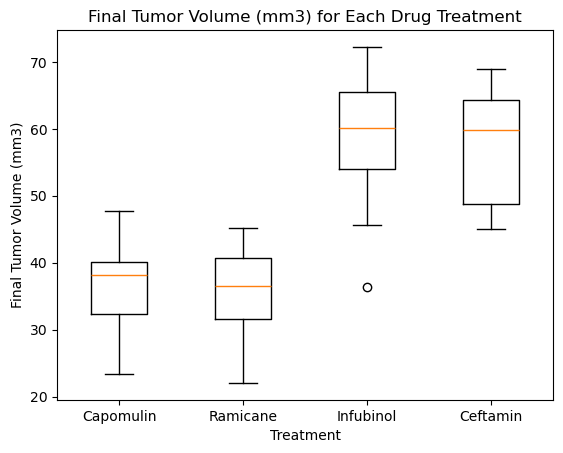

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels = treatments)
plt.xlabel("Treatment")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume (mm3) for Each Drug Treatment")
plt.show()

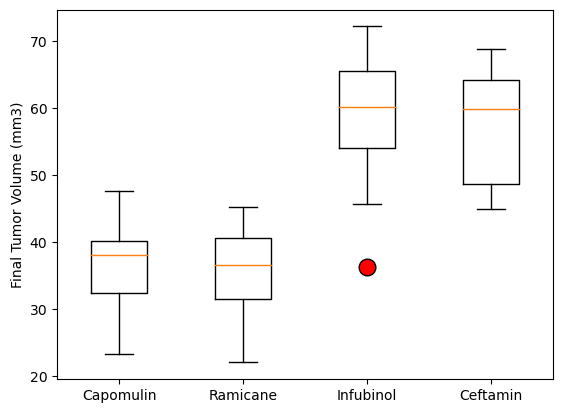

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

What mouse from the Capomulin data would you like to look at progress for?
Pick a number between 1 and 25: 
2


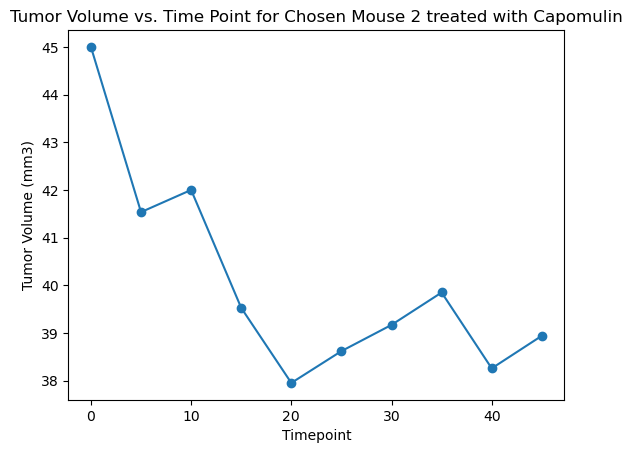

In [44]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulinmice = SCC_with_final_timepoint[SCC_with_final_timepoint['Drug Regimen'] == 'Capomulin']
#num_mice_capomulin = capomulinmice['Mouse ID'].nunique() -- = 25
what_mouse = int(input("""What mouse from the Capomulin data would you like to look at progress for?
Pick a number between 1 and 25: 
"""))
real_mouse_number = what_mouse -1
mouse_plot = capomulinmice['Mouse ID'].iloc[real_mouse_number]
selected_mouse= SCC_mice_data[SCC_mice_data['Mouse ID'] == mouse_plot]


plt.plot(selected_mouse['Timepoint'], selected_mouse['Tumor Volume (mm3)'], marker='o', linestyle='-')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Chosen Mouse {what_mouse} treated with Capomulin')
plt.show()

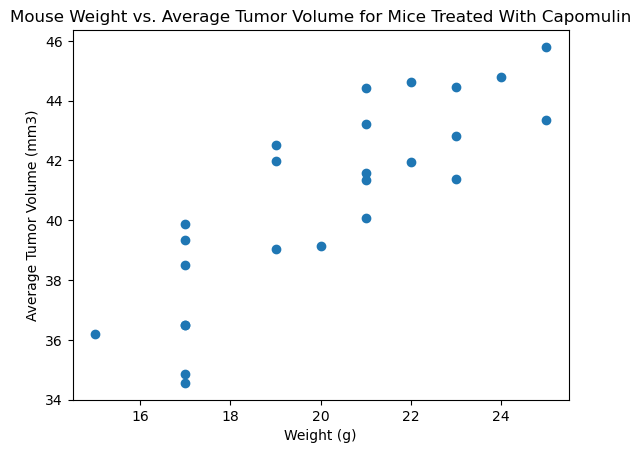

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulinmice = SCC_with_final_timepoint[SCC_with_final_timepoint['Drug Regimen'] == 'Capomulin']

# SCC_mice_data

average_tumor_volume = SCC_mice_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
mean_tumor_df_for_capomulin = pd.merge(average_tumor_volume, capomulinmice[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='inner')


# Plot mouse weight vs. average tumor volume
plt.scatter(mean_tumor_df_for_capomulin['Weight (g)'], mean_tumor_df_for_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Mice Treated With Capomulin')
plt.show()


## Correlation and Regression

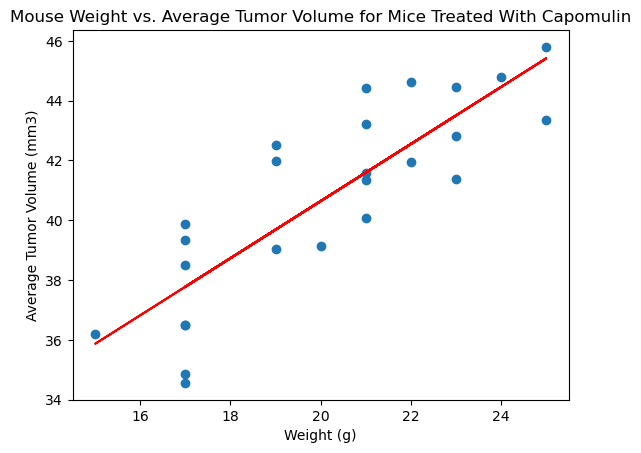

The correlation between mouse weight (g) and the average tumor volume for mice on capomulin is PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)


In [57]:

correlation = st.pearsonr(mean_tumor_df_for_capomulin['Weight (g)'], mean_tumor_df_for_capomulin['Tumor Volume (mm3)'])
slope, intercept, rvalue, pvalue, stderr = st.linregress(mean_tumor_df_for_capomulin['Weight (g)'], mean_tumor_df_for_capomulin['Tumor Volume (mm3)'])

plt.scatter(mean_tumor_df_for_capomulin['Weight (g)'], mean_tumor_df_for_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Mice Treated With Capomulin')
#Linear Regression Line
lin_equation = slope * mean_tumor_df_for_capomulin['Weight (g)'] + intercept
plt.plot(mean_tumor_df_for_capomulin['Weight (g)'], lin_equation, color='red')
plt.show()

print(f"The correlation between mouse weight (g) and the average tumor volume for mice on capomulin is {correlation}")